In [11]:
#calcular varianza y media de cada archivo individualmente
import numpy as np
import pandas as pd
import os
dataDirectory = "../../csv/allTogether"
currentInterestData = dataDirectory + '/allActions'
docFile = "../../csv/README_DOC.txt"
doc = open(docFile, "r")
files = os.listdir(currentInterestData)
for file in files:
    if not file.endswith(".csv"):
        continue
    data = pd.read_csv(currentInterestData + '/' + file, header=None)
    testFile = open(file.split('.')[0] + '.csv', "w+")
    testFile.write("Variable,variance,mean\n")
    for column in data:
        name = doc.readline().strip()
        col_data = data[column][1:]
        vairance = np.var(col_data.astype(np.single))
        mean = np.mean(col_data.astype(np.single))
        testFile.write(f"{name},{vairance:.6f},{mean:.6f}\n")

    doc.seek(0)
    testFile.close()
    


In [12]:
#meain variance of motion, rot + traslation for all files in the interest folder
import pandas as pd
import numpy as np
import os


interestFolder = "idle"
dirFiles = '/analysis/metrics/varianceMean/' + interestFolder
outputFile = f'/analysis/metrics/{interestFolder}MotionVariance.csv'
varNames = pd.read_csv("/analysis/varNames.csv")

#turn the varNames into a list
varNames = varNames["Variable"].tolist()

i=1
resultDict = {}

for file in os.listdir(dirFiles):
    if not file.endswith(".csv"):
        continue
    df = pd.read_csv(dirFiles + "/" + file)
    for n in varNames:
        xrot = n.strip() + " XROT"
        yrot = n.strip() + " YROT"
        zrot = n.strip() + " ZROT"
        xpos = n.strip() + " XPOS"
        ypos = n.strip() + " YPOS"
        zpos = n.strip() + " ZPOS"
        #extract each of the rows for the variables
        xrotRow = df.loc[df['Variable'] == xrot]
        yrotRow = df.loc[df['Variable'] == yrot]
        zrotRow = df.loc[df['Variable'] == zrot]
        xposRow = df.loc[df['Variable'] == xpos]
        yposRow = df.loc[df['Variable'] == ypos]
        zposRow = df.loc[df['Variable'] == zpos]
        #get the variance and sum it all by axis
        xrotVar = xrotRow['variance'].values[0] if not xrotRow.empty else 0
        yrotVar = yrotRow['variance'].values[0] if not yrotRow.empty else 0
        zrotVar = zrotRow['variance'].values[0] if not zrotRow.empty else 0
        xposVar = xposRow['variance'].values[0] if not xposRow.empty else 0
        yposVar = yposRow['variance'].values[0] if not yposRow.empty else 0
        zposVar = zposRow['variance'].values[0] if not zposRow.empty else 0

        xsum = xrotVar + xposVar
        ysum = yrotVar + yposVar
        zsum = zrotVar + zposVar

        preVal = resultDict.get(n.strip(), [0,0,0])

        #divide by i
        newValx = preVal[0] + xsum/i
        newValy = preVal[1] + ysum/i
        newValz = preVal[2] + zsum/i

        resultDict[n.strip()] = [newValx, newValy, newValz]

    i+=1

print(resultDict)

#write the result to a csv file but normalize the values

with open(outputFile, "w+") as f:
    f.write("Variable,X,Y,Z\n")
    for key in resultDict.keys():
        f.write(f"{key},{resultDict[key][0]:.6f},{resultDict[key][1]:.6f},{resultDict[key][2]:.6f}\n")
    


{'pelvis': [0.0035392416527916526, 0.002520243936618937, 183.05381863349152], 'spine': [9.657494473942725, 6.918418348576424, 0.07586211428293928], 'spine.001': [0.00668861045066045, 0.587756241144966, 39.646159863517035], 'neck': [98.01197865808356, 70.80770131751584, 993.3531677910589], 'face': [38.970264303441, 0.0, 0.0], 'shoulder.L': [4.138737614196914, 9.678010878010877e-05, 0.06227592206682206], 'upper_arm.L': [1475.9168088575427, 320.5670548517982, 3176.796547386955], 'forearm.L': [1728.6530263088493, 515.0196189992313, 2304.847083101842], 'shoulder.R': [4.138740685986235, 9.573169608169609e-05, 0.062277518556443555], 'upper_arm.R': [1449.3826341594017, 280.73768723904425, 3129.6499873547946], 'forearm.R': [1358.2250621387334, 529.8476114053474, 2052.4174293240426], 'pelvis.L': [3.9359473480269727, 0.0, 0.0], 'pelvis.R': [3.9359469480269724, 0.0, 0.0], 'thigh.L': [24.052236376229324, 16.42390448620269, 0.09324247553835056], 'shin.L': [44.24568622599067, 6.148536572899322, 0.525

In [13]:
#variance of rotations only
import pandas as pd
import numpy as np
import os


interestFolder = "idle"
dirFiles = '/analysis/metrics/varianceMean/' + interestFolder
outputFile = f'/analysis/metrics/{interestFolder}RotationVariance.csv'
varNames = pd.read_csv("/analysis/varNames.csv")

#turn the varNames into a list
varNames = varNames["Variable"].tolist()

i=1
resultDict = {}

for file in os.listdir(dirFiles):
    if not file.endswith(".csv"):
        continue
    df = pd.read_csv(dirFiles + "/" + file)
    for n in varNames:
        xrot = n.strip() + " XROT"
        yrot = n.strip() + " YROT"
        zrot = n.strip() + " ZROT"
        #extract each of the rows for the variables
        xrotRow = df.loc[df['Variable'] == xrot]
        yrotRow = df.loc[df['Variable'] == yrot]
        zrotRow = df.loc[df['Variable'] == zrot]
        #get the variance and sum it all by axis
        xrotVar = xrotRow['variance'].values[0] if not xrotRow.empty else 0
        yrotVar = yrotRow['variance'].values[0] if not yrotRow.empty else 0
        zrotVar = zrotRow['variance'].values[0] if not zrotRow.empty else 0

        xsum = xrotVar 
        ysum = yrotVar 
        zsum = zrotVar 

        preVal = resultDict.get(n.strip(), [0,0,0])

        #divide by i
        newValx = preVal[0] + xsum/i
        newValy = preVal[1] + ysum/i
        newValz = preVal[2] + zsum/i

        resultDict[n.strip()] = [newValx, newValy, newValz]

    i+=1

print(resultDict)

#write the result to a csv file
with open(outputFile, "w+") as f:
    f.write("Variable,X,Y,Z\n")
    for key in resultDict.keys():
        f.write(f"{key},{resultDict[key][0]:.6f},{resultDict[key][1]:.6f},{resultDict[key][2]:.6f}\n")
    


{'pelvis': [0.0, 0.0, 183.05364414364803], 'spine': [9.657494473942725, 6.918418348576424, 0.07586211428293928], 'spine.001': [0.00668861045066045, 0.587756241144966, 39.646159863517035], 'neck': [98.01197865808356, 70.80770131751584, 993.3531677910589], 'face': [38.970264303441, 0.0, 0.0], 'shoulder.L': [4.138737614196914, 9.678010878010877e-05, 0.06227592206682206], 'upper_arm.L': [1475.9168088575427, 320.5670548517982, 3176.796547386955], 'forearm.L': [1728.6530263088493, 515.0196189992313, 2304.847083101842], 'shoulder.R': [4.138740685986235, 9.573169608169609e-05, 0.062277518556443555], 'upper_arm.R': [1449.3826341594017, 280.73768723904425, 3129.6499873547946], 'forearm.R': [1358.2250621387334, 529.8476114053474, 2052.4174293240426], 'pelvis.L': [3.9359473480269727, 0.0, 0.0], 'pelvis.R': [3.9359469480269724, 0.0, 0.0], 'thigh.L': [24.052236376229324, 16.42390448620269, 0.09322951603951607], 'shin.L': [44.24568622599067, 6.148536572899322, 0.5258617409063159], 'foot.L': [26.08396

In [14]:
#variance of translations only
import pandas as pd
import numpy as np
import os


interestFolder = "idle"
dirFiles = '/analysis/metrics/varianceMean/' + interestFolder
outputFile = f'/analysis/metrics/{interestFolder}TranslationVariance.csv'
varNames = pd.read_csv("/analysis/varNames.csv")

#turn the varNames into a list
varNames = varNames["Variable"].tolist()

i=1
resultDict = {}

for file in os.listdir(dirFiles):
    if not file.endswith(".csv"):
        continue
    df = pd.read_csv(dirFiles + "/" + file)
    for n in varNames:
        xpos = n.strip() + " XPOS"
        ypos = n.strip() + " YPOS"
        zpos = n.strip() + " ZPOS"
        #extract each of the rows for the variables
        xposRow = df.loc[df['Variable'] == xpos]
        yposRow = df.loc[df['Variable'] == ypos]
        zposRow = df.loc[df['Variable'] == zpos]
        #get the variance and sum it all by axis
        xposVar = xposRow['variance'].values[0] if not xposRow.empty else 0
        yposVar = yposRow['variance'].values[0] if not yposRow.empty else 0
        zposVar = zposRow['variance'].values[0] if not zposRow.empty else 0

        xsum = xposVar
        ysum = yposVar
        zsum = zposVar

        preVal = resultDict.get(n.strip(), [0,0,0])

        #divide by i
        newValx = preVal[0] + xsum/i
        newValy = preVal[1] + ysum/i
        newValz = preVal[2] + zsum/i

        resultDict[n.strip()] = [newValx, newValy, newValz]

    i+=1

print(resultDict)

#write the result to a csv file
with open(outputFile, "w+") as f:
    f.write("Variable,X,Y,Z\n")
    for key in resultDict.keys():
        f.write(f"{key},{resultDict[key][0]:.6f},{resultDict[key][1]:.6f},{resultDict[key][2]:.6f}\n")


{'pelvis': [0.0035392416527916526, 0.002520243936618937, 0.00017448984348984346], 'spine': [0.0, 0.0, 0.0], 'spine.001': [0.0, 0.0, 0.0], 'neck': [0.0, 0.0, 0.0], 'face': [0.0, 0.0, 0.0], 'shoulder.L': [0.0, 0.0, 0.0], 'upper_arm.L': [0.0, 0.0, 0.0], 'forearm.L': [0.0, 0.0, 0.0], 'shoulder.R': [0.0, 0.0, 0.0], 'upper_arm.R': [0.0, 0.0, 0.0], 'forearm.R': [0.0, 0.0, 0.0], 'pelvis.L': [0.0, 0.0, 0.0], 'pelvis.R': [0.0, 0.0, 0.0], 'thigh.L': [0.0, 0.0, 1.2959498834498836e-05], 'shin.L': [0.0, 0.0, 0.0], 'foot.L': [0.0, 0.0, 0.0], 'heel.02.L': [0.0, 0.0, 0.0], 'thigh.R': [0.0, 0.0, 1.2959498834498836e-05], 'shin.R': [0.0, 0.0, 0.0], 'foot.R': [0.0, 0.0, 0.0], 'heel.02.R': [0.0, 0.0, 0.0]}


In [14]:
#mean of all means to get naive idle
import pandas as pd
import numpy as np
import os


interestFolder = "idle"
dirFiles = '/analysis/metrics/varianceMean/' + interestFolder
outputFile = f'/analysis/metrics/{interestFolder}MotionMean.csv'
varNames = pd.read_csv("/analysis/varNames.csv")

#turn the varNames into a list
varNames = varNames["Variable"].tolist()

i=1
resultDict = {}

for file in os.listdir(dirFiles):
    if not file.endswith(".csv"):
        continue
    df = pd.read_csv(dirFiles + "/" + file)
    for row in df.iterrows():
        n = row[1]['Variable']

        mean = row[1]['mean']

        preVal = resultDict.get(n.strip(), 0.0)

        #divide by i
        newVal = preVal + mean/i

        resultDict[n.strip()] = newVal

    i+=1

print(resultDict)

#write the result to a csv file
with open(outputFile, "w+") as f:
    f.write("Variable,mean\n")
    for key in resultDict.keys():
        v = resultDict[key]
        f.write(f"{key},{v:.6f}\n")
    


{'pelvis XPOS': 0.042434191657586856, 'pelvis YPOS': -0.06267084686890717, 'pelvis ZPOS': 2.5852440660861364, 'pelvis XROT': 0.0, 'pelvis YROT': 0.0, 'pelvis ZROT': -3.959918145991786, 'spine XPOS': 0.0, 'spine YPOS': 0.0, 'spine ZPOS': 0.0, 'spine XROT': -26.337870178346932, 'spine YROT': 2.435157491441115, 'spine ZROT': 0.3025470977200855, 'spine.001 XROT': 31.739951984779108, 'spine.001 YROT': 0.7974756602659868, 'spine.001 ZROT': 6.514722941840076, 'neck XPOS': 0.0, 'neck YPOS': 0.1057565989735043, 'neck ZPOS': 0.8613179847232489, 'neck XROT': 48.46112543800367, 'neck YROT': 0.7983874558317241, 'neck ZROT': 5.983336059232712, 'face XPOS': 0.0, 'face YPOS': 0.011426490397971195, 'face ZPOS': 0.6546313794841272, 'face XROT': 3.3386142655977364, 'face YROT': -2.472213701476307e-07, 'face ZROT': -6.136796751660841e-08, 'shoulder.L XPOS': 0.0, 'shoulder.L YPOS': 0.10575638428224554, 'shoulder.L ZPOS': 0.8613184999124488, 'shoulder.L XROT': -1.3409797286413585, 'shoulder.L YROT': 0.01538

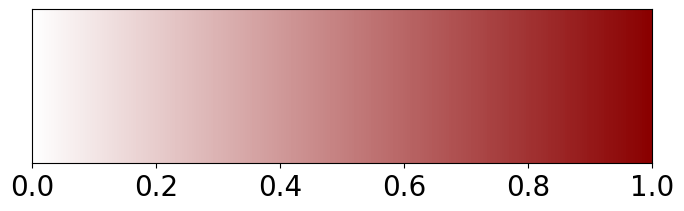

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Seleccionar los colores iniciales y finales
axis = 0
nCol = 256
selectColor = [("#FFFFFF", "#8A0000"), ("#FFFFFF", "#007807"), ("#FFFFFF", "#002D81")]

# Generar la lista de colores
start_color = selectColor[axis][0]
end_color = selectColor[axis][1]

# Crear el colormap
colors = [start_color, end_color]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=nCol)

# Crear una imagen que use el colormap
gradient = np.linspace(0, 1, nCol)
gradient = np.vstack((gradient, gradient))

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 2))

# Mostrar el colormap
ax.imshow(gradient, aspect='auto', cmap=cmap)

# Ajustar los límites del gráfico
ax.set_xlim(0, nCol - 1)

# Añadir etiquetas manualmente al eje x
ax.set_xticks(np.linspace(0, nCol - 1, 6))
ax.set_xticklabels(np.round(np.linspace(0, 1, 6), 2))

#make the numbers in the x axis bigger
plt.xticks(fontsize=20)
# Quitar el eje y
ax.yaxis.set_visible(False)

# Mostrar el gráfico
plt.show()
